In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

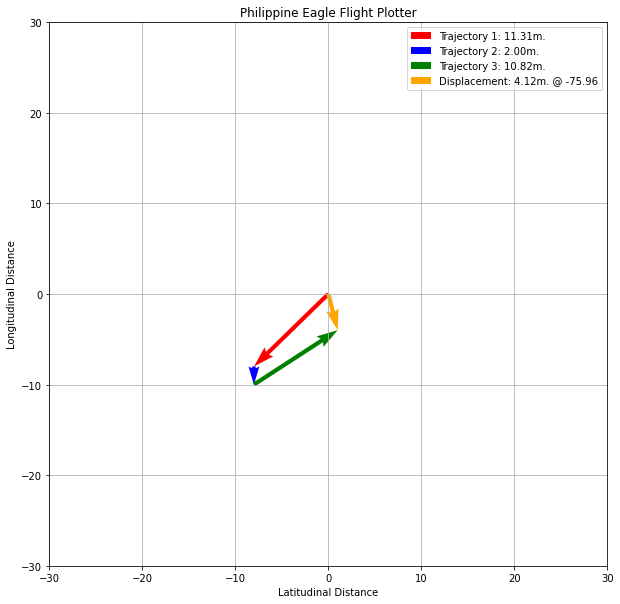

In [13]:
%matplotlib inline
def track_eagle(make_figs=True):
    long = np.random.randint(-10,10, size=3)  ## since we don't actually have eagle tracking data we will use
    lat =  np.random.randint(-10,10, size=3)  ## random integers for this activity. These two lines will produce
                                              ## a vector with shape of (3,) describing the distances for the 
                                              ## eagle's flight.
  
    dist1 = np.array([long[0],lat[0]])        ## setup the array for each vector for the eagle's flight.                
    dist2 = np.array([long[1],lat[1]])  
    dist3 = np.array([long[2],lat[2]])  
    
    dist_total = dist1 + dist2 + dist3    ## compute for the resultant vector for the eagle's flight.                        
    disp  = np.linalg.norm(dist_total)    ## compute for the magnitude of the displacement                           
    alpha = 10**-6
    theta = np.arctan((dist_total[1])/(dist_total[0] + alpha))    ## compute for the angle of the displacement. Hint 
    theta = np.degrees(theta)                                     ## convert theta from rad to deg.
   
    ## Plotting the PH Eagle flight vectors.
    plt.figure(figsize=(10,10)) 
    plt.title('Philippine Eagle Flight Plotter')
    plt.xlim(-30, 30)
    plt.ylim(-30, 30)
    plt.xlabel('Latitudinal Distance')
    plt.ylabel('Longitudinal Distance')
    plt.grid()
    n = 2

    

            # C for the color
            # angles='xy', scale_units='xy', scale=1
 
    
    #(trajectory 1)
    plt.quiver(0,0, dist1[0], dist1[1], 
               angles='xy', scale_units='xy',scale=1, color='red', 
               label='Trajectory 1: {:.2f}m.'.format(np.linalg.norm(dist1)))
    # (trajectory 2)
    plt.quiver(dist1[0], dist1[1], dist2[0], dist2[1], 
               angles='xy', scale_units='xy',scale=1, color='blue',
              label='Trajectory 2: {:.2f}m.'.format(np.linalg.norm(dist2)))
    # (trajectory 3)
    plt.quiver(np.add(dist1[0],dist2[0]), np.add(dist1[1],dist2[1]),
               dist3[0], dist3[1], angles='xy', scale_units='xy',scale=1, color='green',
              label='Trajectory 3: {:.2f}m.'.format(np.linalg.norm(dist3)))
    #(total displacement)
    plt.quiver(0,0, dist_total[0], dist_total[1], 
               angles='xy', scale_units='xy',scale=1, color='orange',
              label='Displacement: {:.2f}m. @ {:.2f}'.format(disp, theta))
    
    plt.legend()    
    
    if make_figs:
        plt.savefig(f'LinAlg-Lab2-PH Eagle-{int(disp)}@{int(theta)}.png', dpi=300)
    
    plt.show()   

track_eagle(make_figs=False) 

In [12]:
def eagle_kinematics(position, time):
    req_shape = 4
    velocity = np.zeros((req_shape-1,))  # zeroes in array [0,0,0]
    acceleration = np.zeros((req_shape-2,))  # zeroes in array [0,0]
    total_vector = np.array([t**3, t**2, t, 1]) # array in a total vector [8,4,2,1]
    if position.shape == (req_shape,): 
        velocity = np.array([3*position[0],2*position[1], position[2]]) # np.array of the velocity[6,2,3]  
        acceleration = np.array([2*velocity[0],velocity[1]]) # np.array of the acceleration is [12,2]
        position_total = np.sum(np.multiply(position, total_vector)) # the np.multiply([8x2,4x1,2x3,1x2]) = the np.sum[16+4+6+2] = 28
        velocity_total = np.sum(np.multiply(velocity, total_vector[1:])) # the  np.multiply([4x6,2x2,1x3]) = the np.sum[24+4+3] = 31
        acceleration_total = np.sum(np.multiply(acceleration, total_vector[2:])) # the np.multiply([2,1],[12,2]) =the np.sum[24+2] = 26
    else:
        print(f'Input displacement vector is not valid. Make sure that the vector shape is ({req_shape},)')
    
    return position_total, velocity_total, acceleration_total

x = np.array([2,1,3,2])
t = 2
eagle_kinematics(x, t)

(28, 31, 26)

In [9]:
def month_profit_trace(profit, reach, make_figs=True): 
    if (profit.shape == (4,)) and (reach.shape == (4,)): #checks if the number of profit and shape are 4 (4 because there are 4 weeks in a month) 
        week1 = np.array((reach[0], profit[0])) #creates an array for the weekly with reach and profit as the elements      
        week2 = np.array((reach[1], profit[1]))  
        week3 = np.array((reach[2], profit[2]))  
        week4 = np.array((reach[3], profit[3]))  
        
        week_total = week1 + week2 + week3 + week4          #computes the resultant
        week_performance = np.linalg.norm(week_total)       #computes the magnitude
        alpha = 10**-6
        reach_gradient = np.arctan((week_total[1])/(week_total[0] + alpha))    ## computes for the angle of the displacement.     
        reach_gradient = np.degrees(reach_gradient)                            ## converts theta from rad to deg. 
        

                                       
        plt.figure(figsize=(16,5))
        plt.title('Bebang\'s Month Post Efficiency')
        plt.xlim(0,1.01*np.sum(reach))
        plt.ylim(-np.sum(np.abs(profit)),np.sum(np.abs(profit)))
        plt.xlabel('FB Post Reach Increment')
        plt.ylabel('Profit')
        plt.grid()

        #Week 1
        plt.quiver(0,0, week1[0], week1[1], 
                   angles='xy', scale_units='xy',scale=1, color='blue', width=0.0025,
                   label='Week 1: {:.2f}'.format(np.linalg.norm(week1)))
        #Week 2
        plt.quiver(week1[0], week1[1], week2[0], week2[1], 
                   angles='xy', scale_units='xy',scale=1, color='orange', width=0.0025, 
                   label='Week 2: {:.2f}'.format(np.linalg.norm(week2)))
        #Week 3
        plt.quiver((week1[0] + week2[0]), (week1[1] + week2[1]), week3[0], week3[1], 
                   angles='xy', scale_units='xy',scale=1, color='brown', width=0.0025, 
                   label='Week 3: {:.2f}'.format(np.linalg.norm(week3)))
        #Week 4
        plt.quiver((week1[0] + week2[0] + week3[0]), (week1[1] + week2[1] + week3[1]), week4[0], week4[1], 
                   angles='xy', scale_units='xy',scale=1, color='yellowgreen', width=0.0025, 
                   label='Week 4: {:.2f}'.format(np.linalg.norm(week4)))
             
        
        # Efficiency
        plt.quiver(0,0, week_total[0], week_total[1], 
                   angles='xy', scale_units='xy',scale=1, color='black', width=0.005, 
                   label='Efficiency: {:.2f} @ {:.2f}'.format(week_performance, reach_gradient))

        plt.legend(loc='upper left')

        if make_figs:
            plt.savefig(f'LinAlg-Lab2-Bebang Post Eff-{int(week_performance)}@{int(reach_gradient)}.png', dpi=300)

        plt.show()
    
    else:
        print('Wait for the month to finish to calculation of the Monthly Post Efficiency')

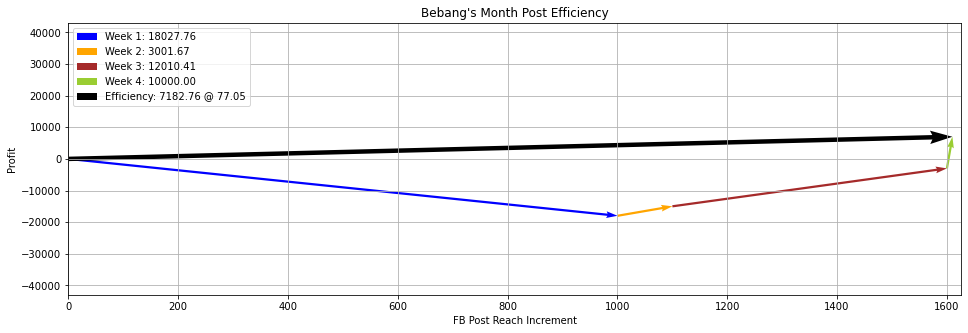

In [10]:
# Original Value
profit= np.array([-18000, 3000, 12000, 10000])  # Bebang's Online Business
# Original Value
reach = np.array([1000, 100, 500, 10])          # Bebang's FB Posts  

month_profit_trace(profit, reach, make_figs=False) 